NAMA: MUHAMMAD ANDIKO PUTRA
NIM: 09011281823048
KELAS: SK5B

https://www.kaggle.com/akashadesai/covid19-detect-using-deep-learning

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid-19-x-ray-10000-images/train_covid19.py
/kaggle/input/covid-19-x-ray-10000-images/generate_images.py
/kaggle/input/covid-19-x-ray-10000-images/covid19.model
/kaggle/input/covid-19-x-ray-10000-images/requirements.txt
/kaggle/input/covid-19-x-ray-10000-images/generated_dataset/normal/normal (1).jpg
/kaggle/input/covid-19-x-ray-10000-images/generated_dataset/covid/covid (1).jpg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0243-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0255-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0218-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0266-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0227-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0264-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0216-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0215-0001.jpeg
/ka

In [2]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


**Load Data**

In [3]:
DATASET_DIR = "../input/covid-19-x-ray-10000-images/dataset"


In [4]:
os.listdir(DATASET_DIR)

['normal', 'covid']

-----------------------


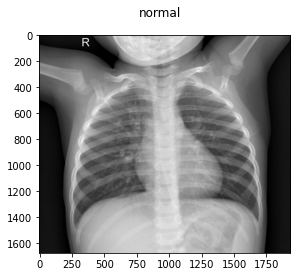

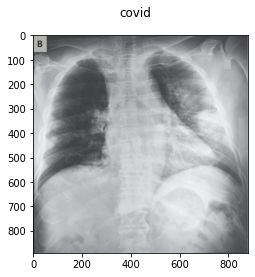

In [5]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("-----------------------")
normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 


covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray')

In [6]:
print(len(normal_images))
print(len(covid_images))

28
70


In [31]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 20
BATCH_SIZE = 20


CNN

In [32]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(INPUT_SHAPE)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
     tf.keras.layers.Dense(128,activation='relu'),
    #tf.keras.layers.Dropout(0.25)
    tf.keras.layers.Dense(1,activation='sigmoid')
    
    
])

In [33]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.001),
                  metrics=['accuracy'])


In [34]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 69, 69, 256)       295168    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 34, 34, 256)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 256)      

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 69 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Train for 3 steps, validate for 1 steps
Epoch 1/26
3/3 [==============================] - 16s 5s/step - loss: 23.3179 - accuracy: 0.5833 - val_loss: 0.4700 - val_accuracy: 1.0000
Epoch 2/26
3/3 [==============================] - 13s 4s/step - loss: 0.6472 - accuracy: 0.6531 - val_loss: 0.6596 - val_accuracy: 1.0000
Epoch 3/26
3/3 [==============================] - 13s 4s/step - loss: 0.6271 - accuracy: 0.7143 - val_loss: 0.2489 - val_accuracy: 1.0000
Epoch 4/26
3/3 [==============================] - 13s 4s/step - loss: 0.6132 - accuracy: 0.7143 - val_loss: 0.5874 - val_accuracy: 1.0000
Epoch 5/26
3/3 [==============================] - 15s 5s/step - loss: 0.5518 - accuracy: 0.7167 - val_loss: 0.0616 - val_accuracy: 1.0000
Epoch 6/26
3/3 [==============================] - 13s 4s/step - loss: 0.8752 - accuracy: 0.5510 - val_loss: 0.2368 - val_accuracy: 1.0000
Epoch 7/26
3/3 [==============================] - 1

Graphical Visulization train vs test.

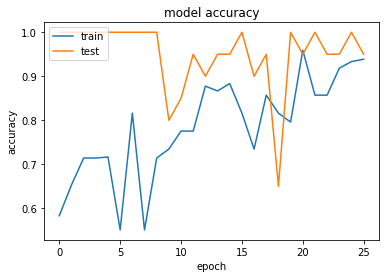

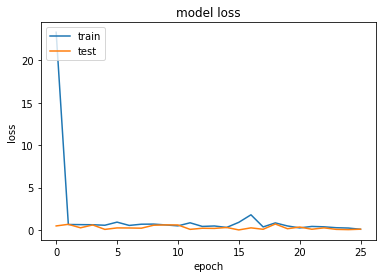

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.93877554
validation_accuracy 0.95


prediction

In [14]:
label = validation_generator.classes


In [15]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']
